In [2]:
import pandas as pd
import time
#import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import spacy

In [3]:
intents = {
    'hi' : ['hello','hey','hi!','hi','namaste','hola'],
    'bye' : ['goodbye','buhbye','bye','adios','see you'],
    'depression' : ['depressed','sad','worried','despair','misery','bad','unhapy','glum','gloomy'],
    'anxiety' : ['anxiety','anxious','nervous','stress','strain','tension','discomfort','tensed'],
    'paranoia' :['disbelieve', 'distrustful', 'doubting', 'incredulous','mistrustful', 'negativistic','questioning','show-me','skeptical','suspecting','suspicious','unbelieving','mortification'],
    'sleeping_disorder' :['restlessness','indisposition','sleeplessness','stress','tension','vigil','vigilance','wakefulness'],
    'substance_abuse' :['alcohol abuse','drug abuse','drug use','addiction','alcoholic addiction','alcoholism','chemical abuse','dipsomania','drug dependence','drug habit','narcotics abuse','solvent abuse'],
    'personality_disorder':['insanity','emotional instability','mental disorder','schizophrenia','craziness','delusions','depression','derangement','disturbed mind','emotional disorder','emotional instability',
                            'loss of mind','lunacy','madness','maladjustment','mania','mental disease','mental sickness','nervous breakdown','nervous disorder','apprehensive',
                            'neurosis','neurotic disorder','paranoia','phobia','psychopathy','psychosis','sick mind','troubled mind','unbalanced mind','unsoundness of mind'],
    'happy':['good','great','relieved','happy','okay','content','jovial','cheerful','delighted','jolly']
}
 
responses = {
    'hi' : 'Namaste!I am Sakhi your personal therapist.',
    'bye' : 'Adios!',
    'default' : 'Sorry mate, I am not able to understand you :('
}
 
dictionary = {
    'a':0,
    'b' : 0,
    'c' : 0,
    'd' : 0
}
 
s = {
    'a':0,
    'b' : 1,
    'c' : 2,
    'd' : 3
}
 
questions = ["Do you have little interest or pleasure in doing things?",\
             "Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",\
             "Feeling tired or having little energy","Feeling bad about yourself - or that you are a failure or have let yourself or your family down"]

In [4]:
data = pd.read_csv("/content/drive/MyDrive/emotion-stimulus.csv", header=0, delimiter=",", quoting=2,error_bad_lines=False)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data

,Emotion,Text
0,happy,I suppose I am happy being so ` tiny' ; it mea...
1,happy,Lennox has always truly wanted to fight for th...
2,happy,"He was a professional musician now , still sen..."
3,happy,Holmes is happy having the freedom of the hous...
4,happy,I had problems with tutors trying to encourage...
...,...,...
2409,shame,He gets real humiliated and has to leave .
2410,shame,They aimed for higher status jobs and felt hum...
2411,shame,He cursed his lack of self-control ; he knew t...
2412,shame,Sometimes I've thought I 'll never forget wha...


In [7]:
#nlp = spacy.load("en_core_web_lg")

bot = "BOT: {0}"
user =  "USER: {0}"

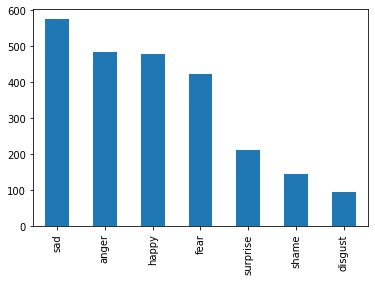

In [8]:
#data = data[0:100]
data['Emotion'].value_counts().plot.bar()

plt.show()

In [9]:
train, test = train_test_split(data, test_size = 0.2, random_state = 12, stratify = data['Emotion'])

#data = data.drop(['Unnamed: 0'], axis=1)
X = data['Text']
y = data['Emotion']

In [10]:
X_train = train.Text
y_train = train.Emotion
X_test = test.Text
y_test = test.Emotion

In [11]:
vectorizer = TfidfVectorizer( max_df= 0.9).fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape)

(1931, 6514)


In [12]:
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [13]:
model = LogisticRegression(C=.1, class_weight='balanced')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.9492490937338167
Testing Accuracy  :  0.7971014492753623


In [14]:
negative = 0
positive = 0

In [ ]:
def intent(message):
    for words in intents.keys():
        pattern = re.compile('|'.join([syn for syn in intents[words]]))
        match = pattern.search(message)
        if match:
            return words
    return 'default'

In [ ]:
def respond(message):
    word = intent(message)
    return responses[word]

In [ ]:
def score(name):
    sc = 0
    for k in dictionary.keys():
        sc += dictionary[k]*s[k]
    print("Your mental assessment score is ",sc)
    if(sc >=0 and sc <=5):
        print(bot.format("You can always talk to me and vent out your emotions.What's your mood now after opening up?"))
        message = input().lower()
        m_intent = intent(message)
        if(m_intent == 'depression'):
            depression(name)
        elif(m_intent == 'anxiety'):
            anxiety(name)
        elif(m_intent == 'sleeping disorder'):
            sleeping_disorder(name)
        elif(m_intent == 'paranoia'):
            paranoia(name)
        elif(m_intent == 'personality_disorder'):
            personality_disorder(name)
        elif(m_intent == substance_abuse):
            substance_abuse(name)
        elif(m_intent == 'happy'):
            time.sleep(1)
            print(bot.format("Talk to me whenever you feel low. I will always listen to you ;)."))
        else:
            extreme(name)
    elif sc >=6 and sc <=15:
        extreme(name)

In [ ]:
def extreme(name):
    print(bot.format("Aww sweetheart!You need to seek help from our local assistance"))
    time.sleep(1)
    print(bot.format("Here are the details",name))
    print(bot.format("Contact Jeevan Suicide Prevention Hotline"))
    print(bot.format("Address:171, Ambiga Street Golden George Nagar, Nerkundram, Chennai, Tamil Nadu 600107"))
    print(bot.format("Number : 044 2656 4444"))

In [ ]:
def quiz(name):
    time.sleep(1)
    print(bot.format("We will take a fun test together to access your mental health and try to analyze your mental health"))
    print()
    time.sleep(0.8)
    print(bot.format("Please pick one of the options"))
    print("A. not at all")
    print("B. several days")
    print("C. more than half a day")
    print("D. all the days")
    print()
    time.sleep(1)
    print("We will be starting our quiz now. Make sure you are honest with me honey!")
    inp = input().lower()
    if inp == 'okay':
        for sentence in questions:
            time.sleep(1)
            print(bot.format(sentence))
            resp = input().lower()
            dictionary[resp]=dictionary[resp]+1
    else:
        greet()
    print()
    time.sleep(1)
    print("Thank you for trusting me! You are the Best")
    for k in dictionary.keys():
        print(k,dictionary[k])
    score(name)

In [ ]:
def predict_(x):
    tfidf = vectorizer.transform([x])
    preds = model.predict(tfidf)
    probab = model.predict_proba(tfidf)[0][preds]
    print(preds,probab)
    feeling(preds,probab)
    #print(preds)
    print(preds)
    return preds

In [ ]:
def feeling(pred,probab):
    global negative,positive
    if pred == 0 or pred == 1 or pred == 4:
        negative = negative + 1;
        if probab >= 0.5:
            time.sleep(1)
            print(bot.format("Oh, I'm so sorry to hear that!"))
        else:
            time.sleep(1)
            print(bot.format("Okay, thanks for trusting me and sharing your thoughts."))
    else:
        positive = positive + 1;
        if probab >= 0.5:
            time.sleep(1)
            print(bot.format("That's great to hear!"))
        else:
            time.sleep(1)
            print(bot.format("Okay, thanks for sharing."))

In [ ]:
def classification(pred):
    if pred == 0 or pred == 1 or pred ==4:
        return 0
    else:
        return 1

In [ ]:
def name_extraction(message):
    doc = nlp(message)
    name = ''
    for ent in doc.ents:
        if ent.label_=="PERSON":
            return str(ent)
    x = message.split()
    if len(x)<=2:
        return (x[0])
    elif (' '.join(x[0:3]).lower())=='my name is':
        return ''.join(x[3:])

In [ ]:
def cbt():
    time.sleep(1)
    print(bot.format("Mood tracking and thinking hygiene, among other useful concepts are skills you'll learn as you practice CBT"))
    time.sleep(1)
    print(bot.format("Skills that can help you make positive changes to your thoughts, feelings and behaviour"))

In [ ]:
def depression(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am very sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('There you go...let it all slide out. Unhappiness cannot stick in a person\'s soul when it\'s slick with tear.'))


In [ ]:
def anxiety(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('Take a deep breath, listen to your thoughts, try to figure them out. Then take things one day at a time.'))


In [ ]:
def paranoia(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('If you want someone, you have to be willing to wait for them and trust that what you have is real and strong enough for them to wait for you. If somebody jumps ship for you, that fact will always haunt you because you\'ll know they\'re light on their feet. Spare yourself the paranoia and the pain and walk away until the coast is clear.'))



In [ ]:
def sleeping_disorder(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('Overhead, the glass envelope of the Insomnia Balloon is malfunctioning. It blinks on and off at arrhythmic intervals, making the world go gray:black, gray:black. In the distance, a knot of twisted trees flashes like cerebral circuitry.'))

def personality_disorder(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('...repeated trauma in childhood forms and deforms the personality. The child trapped in an abusive environment is faced with formidable tasks of adaptation. She must find a way to preserve a sense of trust in people who are untrustworthy, safety in a situation that is unsafe, control in a situation that is terrifyingly unpredictable, power in a situation of helplessness. Unable to care for or protect herself, she must compensate for the failures of adult care and protection with the only means at her disposal, an immature system of psychological defenses.'))



In [ ]:
def substance_abuse(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format(' My Recovery Must Come First So That Everything I Love In Life Doesn’t Have To Come Last.'))


def greet():
    global negative,positive
    while True:
        time.sleep(1)
        negative = 0
        positive = 0
        print(bot.format('Namaste!I am Sakhi your Personal Therapist.'))
        time.sleep(1)
        print(bot.format('Before we proceed, may I know your good name?'))
        message = input()
        name = message
        time.sleep(1)
        print(bot.format(name),", That's a nice name!")
        time.sleep(1)
        print(bot.format("Before we get started, Please tell me how you're feeling right now. How about telling me your current mood"))
        message = input().lower()
        sentiment = predict_(message)
        time.sleep(1)
        print(bot.format("So"),name,"I'm your personal therapist and you can talk to me anytime. Do you wanna know a little more?")
        time.sleep(1)
        message = input().lower()
        sentiment = predict_(message)
        pos = classification(sentiment)
        if pos == 1:
            cbt()
        print(bot.format(name),", How did your last week go?")
        time.sleep(1)
        message = input().lower()
        sentiment = predict_(message)
        pos = classification(sentiment)
        if pos == 0:
            time.sleep(1)
            print(bot.format(name),"I know that some questions can be tough and sometimes painful to answer so I really appreciate you doing this")
        time.sleep(1)
        print(bot.format("Can you tell me a bit about what's going on in your life that has brought you here today?"))
        message = input().lower()
        sentiment = predict_(message)
        if(negative == 0):
            time.sleep(1)
            print(bot.format("That's awesome! You are showing improvement!"))
            time.sleep(1)
        else:
            time.sleep(1)
            print(bot.format('I have got great tools for people dealing with stress,wanna give it a go? Yes/No?'))
            time.sleep(1)
            message = input().lower()
            if  message == 'yes':
                print(bot.format("Great! Thanks for trusting me",name))
                time.sleep(1)
                print(bot.format("Let's start with a small mental assessment test,so buckle up!"))
                time.sleep(1)
                quiz(name)
            else:
                time.sleep(1)
                print(bot.format("Please ask me for help whenever you feel like it! I'm always online."))



In [ ]:
greet()

BOT: Namaste!I am Sakhi your Personal Therapist.
BOT: Before we proceed, may I know your good name?
BOT: Deeksha , That's a nice name!
BOT: Before we get started, Please tell me how you're feeling right now. How about telling me your current mood
[4] [0.16463371]
BOT: Okay, thanks for trusting me and sharing your thoughts.
[4]
BOT: So Deeksha I'm your personal therapist and you can talk to me anytime. Do you wanna know a little more?
[0] [0.1512736]
BOT: Okay, thanks for trusting me and sharing your thoughts.
[0]
BOT: Deeksha , How did your last week go?
[5] [0.17262446]
BOT: Okay, thanks for sharing.
[5]
BOT: Can you tell me a bit about what's going on in your life that has brought you here today?
[4] [0.16275016]
BOT: Okay, thanks for trusting me and sharing your thoughts.
[4]
BOT: I have got great tools for people dealing with stress,wanna give it a go? Yes/No?
BOT: Great! Thanks for trusting me
BOT: Let's start with a small mental assessment test,so buckle up!
BOT: We will take a f